In [9]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(gridExtra)
library('ggh4x')
library("cowplot")
library(patchwork)
is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

In [10]:
color_annotation <- read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

# Read NMF Scores

In [11]:
df<-read.csv('02_NMF_CD4_T_cell_Projection//Th2_Tfh_Baseline_Samples_BRI.csv')

In [12]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [13]:
df_sub<-df %>% filter(NMF_Scores=='NMF5_Th2')

In [14]:
selected_celltype<-"CM CD4 T cell"

`geom_smooth()` using formula = 'y ~ x'


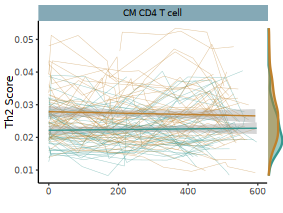

In [18]:
p1 <- ggplot(df_sub %>% filter(AverageScore<0.1), aes(sample.daysSinceFirstVisit, AverageScore, color = `Age Group`)) +
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, 
              alpha=0.5,
              linetype =1)+
  ylab('Th2 Score') +xlab('Days since First Draw') +
  theme_bw(base_size = 6) +
  theme(
    axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()
  ) + 
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  geom_smooth(method = "lm", se = TRUE, 
              linewidth = 0.3) +
  facet_wrap2(~AIFI_L3, axes = "all", 
              remove_labels = "all", ncol = 1, scale = 'free_y') +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = adjustcolor(color_vector[selected_celltype], alpha.f = 0.8), color = NA),
    strip.text = element_text(color = is_dark_color(adjustcolor(color_vector[selected_celltype], alpha.f = 0.8)))
  ) +
  xlab('') +
  theme(legend.position = "none")

p2 <- ggplot(df_sub %>% filter(AverageScore<0.1), aes(AverageScore, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none") +
  theme(plot.margin = margin(0, 0, 0, -1, "mm"))

combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4), align = 'h', axis = 'tb')
options(repr.plot.width = 60/25.4, repr.plot.height = 45/25.4)

combined_plot
ggsave('FigureE.pdf',combined_plot,width = 60/25.4,height = 45/25.4)